In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
import random
from sklearn.model_selection import cross_val_score

#from ggplot import *

In [432]:
df = pd.read_csv("../data/WNS/train.csv")
df.columns = df.columns.str.replace('[?>% ]','')
df.head()
df.isnull().sum()
#df.apply(lambda x:x.isnull().sum())
#df.shape

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met80                 0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [433]:
#temporarily fill na
df.education=df.education.fillna("Bachelor's")
df.previous_year_rating=df.previous_year_rating.fillna(int(3))
df.isnull().sum()
dfnew=pd.get_dummies(df)
dfnew.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met80,awards_won,avg_training_score,is_promoted,department_Analytics,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,...,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170,0.097650,...,0.011951,0.007663,0.712998,0.014688,0.272314,0.297621,0.702379,0.555503,0.020836,0.423661
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137,0.296844,...,0.108666,0.087204,0.452367,0.120300,0.445155,0.457216,0.457216,0.496914,0.142838,0.494142
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [434]:
#df.loc[:,['gender','is_promoted']].groupby(['is_promoted']).describe()
#looks like only aprox 10% ppl gets the promotion and female and male almost equally get a chance
#**promotion is not biased by gender
#df.groupby(['education','is_promoted']).size()
#df.groupby(['previous_year_rating','is_promoted']).size()

In [305]:
#check the prob of a person's education level given gender, age, department, avg_training_score 
#and then impute the education NaN values based on this prob by sampling

In [435]:
#rem = ['employee_id', 'is_promoted']
#x = dfnew.drop(rem,axis=1)
y = dfnew.is_promoted
x_train, x_test, y_train, y_test = train_test_split(dfnew.drop(['is_promoted'],axis=1),y,test_size=0.35,random_state=42)
train_idx = x_train.employee_id
test_idx = x_test.employee_id
x_train = x_train.drop(['employee_id'],axis=1)
x_test = x_test.drop(['employee_id'],axis=1)


In [436]:
#clf = RandomForestClassifier() #-0.36-0.37
#clf = LogisticRegression() ## 0.384 without FE

pred = pd.DataFrame()
for i in range(5):
    #random.seed(random.randint(1,100))
    clf = XGBRegressor()
    model = clf.fit(X=x_train,y=y_train)
    yhat = model.predict(x_test)
    pred = pd.concat([pred,pd.DataFrame(yhat)],axis=1)

pred['prediction'] = pred.apply(lambda x: x.mean() ,axis=1)
pred

,0,0,0,0,0,prediction
0,0.011587,0.011587,0.011587,0.011587,0.011587,0.011587
1,-0.006046,-0.006046,-0.006046,-0.006046,-0.006046,-0.006046
2,0.020893,0.020893,0.020893,0.020893,0.020893,0.020893
3,0.011169,0.011169,0.011169,0.011169,0.011169,0.011169
4,0.042994,0.042994,0.042994,0.042994,0.042994,0.042994
5,0.205323,0.205323,0.205323,0.205323,0.205323,0.205323
6,0.055342,0.055342,0.055342,0.055342,0.055342,0.055342
7,0.005144,0.005144,0.005144,0.005144,0.005144,0.005144
8,0.291432,0.291432,0.291432,0.291432,0.291432,0.291432
9,0.168863,0.168863,0.168863,0.168863,0.168863,0.168863


In [438]:
# cv
#data = np.array(dfnew.drop(['employee_id', 'is_promoted'],axis=1))
#target = dfnew.is_promoted

#clf = XGBRegressor()
#score = cross_val_score(clf,X = data, y= target, scoring='r2_score',cv=5)
#score
#mean_squared_error(y_true=y_test,y_pred=pred.prediction)

0.5120202446225222

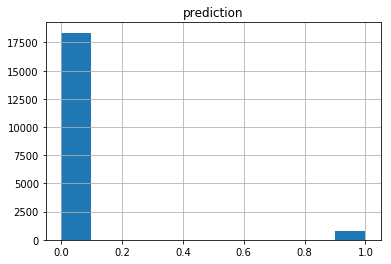

In [439]:
#impfeat = pd.Series(model.feature_importances_, index=x_train.columns.values).sort_values(ascending=False)
#print (impfeat)
#pred.columns = ['c'+ str(i) for i in range(len(pred.columns))]
#pred.columns
#pred.yhat = pred.mean()
pred = pred.prediction
cutoff = 0.24
pred[pred<=cutoff] = 0
pred[pred>cutoff] = 1

pd.DataFrame(pred).hist()
f1_score(y_true=y_test,y_pred=pred)

In [440]:
## test
sub = pd.read_csv('../data/WNS/test.csv')
sub.columns = sub.columns.str.replace('[?>% ]','')
sub.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met80,awards_won,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [441]:
#temporarily fill na
sub.education=sub.education.fillna("Bachelor's")
sub.previous_year_rating = sub.previous_year_rating.fillna(int(3))
sub.isnull().sum()
subnew=pd.get_dummies(sub)
subnew.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met80,awards_won,avg_training_score,department_Analytics,department_Finance,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
count,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,...,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.312984,5.810387,0.358834,0.022776,63.263133,0.098723,0.046445,...,0.011452,0.007663,0.707195,0.015922,0.276884,0.293487,0.706513,0.556748,0.019200,0.424053
std,22640.809201,0.600910,7.679492,1.216959,4.207917,0.479668,0.149191,13.411750,0.298296,0.210452,...,0.106400,0.087203,0.455060,0.125175,0.447468,0.455369,0.455369,0.496780,0.137229,0.494209
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [442]:
submission = model.predict(subnew.drop(['employee_id'],axis=1))
submission[submission<=0.24] = 0
submission[submission>0.24] = 1

In [443]:
submission = pd.concat([subnew.employee_id,pd.DataFrame(submission)],axis=1)

In [445]:
submission.columns = ['employee_id','is_promoted']
#submission.groupby(['is_promoted']).size()
submission.to_csv('../data/WNS/wns_xgb_submission4.csv',index=False)
submission

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0
5,46232,0.0
6,54542,0.0
7,67269,0.0
8,66174,0.0
9,76303,0.0
